In [7]:
from qiskit import transpile
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram
from qiskit.circuit.random import random_circuit
import time

tarot_map = {0:{'name':'愚人 (The Fool)','inverse':{0:'正位：盲目的、有勇气的、超越世俗的、展开新的阶段、有新的机会、追求自我的理想、展开一段旅行、超乎常人的勇气、漠视道德舆论的。',1:'逆位：过于盲目、不顾现实的、横冲直撞的、拒绝负担责任的、违背常理的、逃避的心态、一段危险的旅程、想法如孩童般天真幼稚的'}},1:{'name':'魔术师 (The Magician)','inverse':{0:'正位：成功的、有实力的、聪明能干的、擅长沟通的、机智过人的、唯我独尊的、企划能力强的、透过更好的沟通而获得智慧、运用智慧影响他人、学习能力强的、有教育和学术上的能力、表达技巧良好的。',1:'逆位：变魔术耍花招的、瞒骗的、失败的、狡猾的、善于谎言的、能力不足的、丧失信心的、以不正当手段获取认同的。'}},2:{'name':'女祭司 (The High Priestess)','inverse':{0:'正位：纯真无邪的、拥有直觉判断能力的、揭发真相的、运用潜意识的力量、掌握知识的、正确的判断、理性的思考、单恋的、精神上的恋爱、对爱情严苛的、回避爱情的、对学业有助益的。',1:'逆位：冷酷无情的、无法正确思考的、错误的方向、迷信的、无理取闹的、情绪不安的、缺乏前瞻性的、严厉拒绝爱情的。'}},3:{'name':'皇后 (The Empress)','inverse':{0:'正位：温柔顺从的、高贵美丽的、享受生活的、丰收的、生产的、温柔多情的、维护爱情的、充满女性魅力的、具有母爱的、有创造力的女性、沈浸爱情的、财运充裕的、快乐愉悦的。',1:'逆位：骄傲放纵的、过度享乐的、浪费的、充满嫉妒心的、母性的独裁、占有欲、败家的女人、挥霍无度的、骄纵的、纵欲的、为爱颓废的、不正当的爱情、不伦之恋、美丽的诱惑。'}},4:{'name':'皇帝 (The Emperor)','inverse':{0:'正位：事业成功、物质丰厚、掌控爱情运的、有手段的、有方法的、阳刚的、独立自主的、有男性魅力的、大男人主义的、有处理事情的能力、有点独断的、想要实现野心与梦想的。',1:'逆位：失败的、过于刚硬的、不利爱情运的、自以为是的、权威过度的、力量减弱的、丧失理智的、错误的判断、没有能力的、过于在乎世俗的、权力欲望过重的、权力使人腐败的、徒劳无功的。'}},5:{'name':'教皇 (The Hierophant)','inverse':{0:'正位：有智慧的、擅沟通的、适时的帮助、找到真理、有精神上的援助、得到贵人帮助、一个有影响力的导师、找到正确的方向、学业出现援助、爱情上出现长辈的干涉、媒人的帮助。',1:'逆位：过于依赖的、错误的指导、盲目的安慰、无效的帮助、独裁的、疲劳轰炸的、精神洗脑的、以不正当手段取得认同的、毫无能力的、爱情遭破坏、第三者的介入。'}},6:{'name':'恋人 (The Lovers)','inverse':{0:'正位：爱情甜蜜的、被祝福的关系、刚萌芽的爱情、顺利交往的、美满的结合、面临工作学业的选择、面对爱情的抉择、下决定的时刻、合作顺利的。',1:'逆位：遭遇分离、有第三者介入、感情不合、外力干涉、面临分手状况、爱情已远去、无法结合的、遭受破坏的关系、爱错了人、不被祝福的恋情、因一时的寂寞而结合。'}},7:{'name':'战车 (The Chariot)','inverse':{0:'正位：胜利的、凯旋而归的、不断的征服、有收获的、快速的解决、交通顺利的、充满信心的、不顾危险的、方向确定的、坚持向前的、冲劲十足的。',1:'逆位：不易驾驭的、严重失败、交通意外、遭遇挫折的、遇到障碍的、挣扎的、意外冲击的、失去方向的、丧失理智的、鲁莽冲撞的。'}},8:{'name':'力量 (Strength)','inverse':{0:'正位：内在的力量使成功的、正确的信心、坦然的态度、以柔克刚的力量、有魅力的、精神力旺盛、有领导能力的、理性的处理态度、头脑清晰的。',1:'逆位：丧失信心的、失去生命力的、沮丧的、失败的、失去魅力的、无助的、情绪化的、任性而为的、退缩的、没有能力处理问题的、充满负面情绪的。'}},9:{'name':'隐士 (The Hermit)','inverse':{0:'正位：有骨气的、清高的、有智慧的、有法力的、自我修养的，生命的智慧情境、用智慧排除困难的、给予正确的指导方向、有鉴赏力的、三思而后行的、谨慎行动的。',1:'逆位：假清高的、假道德的、没骨气、没有能力的、内心孤独寂寞的、缺乏支持的、错误的判断、被排挤的、没有足够智慧的、退缩的、自以为是的、与环境不合的。'}},10:{'name':'命运之轮 (The Wheelof Fortune)','inverse':{0:'正位：忽然而来的幸运、即将转变的局势、顺应局势带来成功、把握命运给予的机会、意外的发展、不可预测的未来、突如其来的爱情运变动。',1:'逆位：突如其来的厄运、无法抵抗局势的变化、事情的发展失去了掌控、错失良机、无法掌握命运的关键时刻而导致失败、不利的突发状况、没有答案、被人摆布、有人暗中操作。'}},11:{'name':'正义 (Justice)','inverse':{0:'正位：明智的决定、看清了真相、正确的判断与选择、得到公平的待遇、走向正确的道路、理智与正义战胜一切、维持平衡的、诉讼得到正义与公平、重新调整使之平衡、不留情面的。',1:'逆位：错误的决定、不公平的待遇、没有原则的、缺乏理想的、失去方向的、不合理的、存有偏见的、冥顽不灵的、小心眼、过于冷漠的、不懂感情的。'}},12:{'name':'吊人 (The Hanged Man)','inverse':{0:'正位：心甘情愿的牺牲奉献、以修练的方式来求道、不按常理的、反其道而行的、金钱上的损失、正专注于某个理想的、有坚定信仰的、长时间沈思的、需要沈淀的、成功之前的必经之道。',1:'逆位：精神上的虐待、心不甘情不愿的牺牲、损失惨重的、受到亏待的、严重漏财的、不满足的、冷淡的、自私自利的、要求回报的付出、逃离綑绑和束缚、以错误的方式看世界。'}},13:{'name':'死神 (Death)','inverse':{0:'正位：必须结束旧有的现状、面临重新开始的时刻到了、将不好的过去清除掉、专注于心的开始、挥别过去的历史、展开心的旅程、在心里做个了结、激烈的变化。',1:'逆位：已经历经了重生阶段了、革命已经完成、挥别了过去、失去了、结束了、失败了、病了、走出阴霾的时刻到了、没有转圜余地了。'}},14:{'name':'节制 (Temperance)','inverse':{0:'正位：良好的疏导、希望与承诺、得到调和、有节制的、平衡的、沟通良好的、健康的、成熟与均衡的个性、以机智处理问题、从过去的错误中学习、避免重蹈覆辙、净化的、有技巧的、有艺术才能的。',1:'逆位：缺乏能力的、技术不佳的、不懂事的、需反省的、失去平衡状态、沟通不良的、缺乏自我控制力、不确定的、重复犯错的、挫败的、受阻碍的、暂时的分离、希望与承诺遥遥无期。'}},15:{'name':'恶魔 (The Devil)','inverse':{0:'正位：不伦之恋、不正当的欲望、受诱惑的、违反世俗约定的、不道德的、有特殊的艺术才能、沉浸在消极里、沉溺在恐惧之中的、充满愤怒和怨恨、因恐惧而阻碍了自己、错误的方向、不忠诚的、秘密恋情。',1:'逆位：解脱了不伦之恋、挣脱了世俗的枷锁、不顾道德的、逃避的、伤害自己的、欲望的化解、被诅咒的、欲望强大的、不利的环境、盲目做判断、被唾弃的。'}},16:{'name':'高塔 (The Tower)','inverse':{0:'正位：双方关系破裂、难以挽救的局面、组织瓦解了、损失惨重的、惨烈的破坏、毁灭性的事件、混乱的影响力、意外的发展、震惊扰人的问题、悲伤的、离别的、失望的、需要协助的、生活需要重建的。',1:'逆位：全盘覆没、一切都已破坏殆尽、毫无转圜余地的、失去了、不安的、暴力的、已经遭逢厄运了、急需重建的。'}},17:{'name':'星星 (The Star)','inverse':{0:'正位：未来充满希望的、新的诞生、无限的希望、情感面精神面的希望、达成目标的、健康纯洁的、美好的未来、好运即将到来、美丽的身心、光明的时机、平静的生活、和平的处境。',1:'逆位：希望遥遥无期的、失去信心的、没有寄托的未来、失去目标的、感伤的、放弃希望的、好运远离的、毫无进展的、过于虚幻、假想的爱情运、偏执于理想、希望破灭的。'}},18:{'name':'月亮 (The Moon)','inverse':{0:'正位：负面的情绪、不安和恐惧、充满恐惧感、阴森恐怖的感觉、黑暗的环境、景气低落、白日梦、忽略现实的、未知的危险、无法预料的威胁、胡思乱想的、不脚踏实地的、沉溺的、固执的。',1:'逆位：度过低潮阶段、心情平复、黑暗即将过去、曙光乍现、景气复甦、挥别恐惧、从忧伤中甦醒、恢复理智的、看清现实的、摆脱欲望的、脚踏实地的、走出谎言欺骗。'}},19:{'name':'太阳 (The Sun)','inverse':{0:'正位：前景看好的、运势如日中天的、成功的未来、光明正大的恋情、热恋的、美满的婚姻、丰收的、事件进行顺畅的、物质上的快乐、有成就的、满足的生活、旺盛。',1:'逆位：热情消退的、逐渐黯淡的、遭遇失败的、分离的、傲慢的、失去目标的、没有远景的、失去活力的、没有未来的、物质的贫乏、不快乐的人生阶段。'}},20:{'name':'审判 (Judgement)','inverse':{0:'正位：死而复生、调整心态重新来过、内心的觉醒、观念的翻新、超脱了束缚的、满意的结果、苦难的结束、重新检视过去而得到新的启发、一个新的开始、一段新的关系。',1:'逆位：不公平的审判、无法度过考验的、旧事重演的、固执不改变的、自以为是的、对生命的看法狭隘的、后悔莫及的、自责的、不满意的结果、被击垮的。'}},21:{'name':'世界 (The World)','inverse':{0:'正位：完美的结局、重新开始的、生活上的完美境界、获得成功的、心理上的自由、完成成功的旅程、心灵的融合、自信十足带来成功、生活将有重大改变、获得完满的结果。',1:'逆位：无法完美的、一段过往的结束、缺乏自尊的、感觉难受的、态度悲观的、丑恶的感情、无法挽回的局势、不完美的结局、无法再继续的、残缺的。'}}}

provider = IBMProvider()

#backend = Aer.get_backend('statevector_simulator')
backend = provider.get_backend('ibm_lagos')

seed: 1697993594620893900


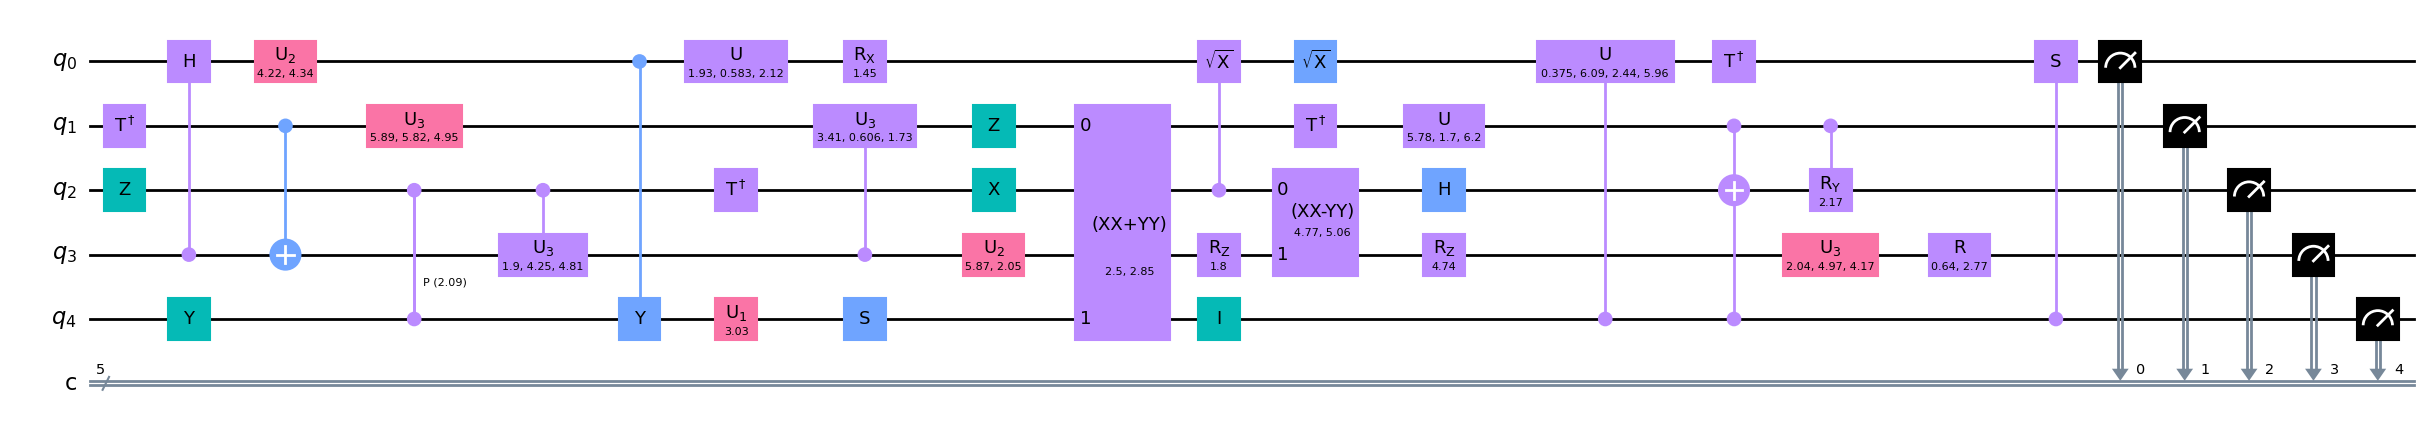

In [3]:
time_ns_seed = time.time_ns()
circuit = random_circuit(5, 10, measure=True, seed=time_ns_seed)

print('seed:',time_ns_seed)
circuit.draw("mpl",fold=-1)
#circuit.draw()

In [4]:
compiled_circuit = transpile(circuit, backend)

job = backend.run(compiled_circuit, shots=1000)

result = job.result()
#psi  = result.get_statevector(circuit)

print('Done.')
print('job_id:',result.job_id)

Done.
job_id: circuit-runner_********************_****_0


{'10001': 14, '11010': 11, '10110': 13, '11101': 13, '11111': 7, '01101': 27, '10111': 8, '01110': 25, '00101': 50, '01001': 17, '00111': 13, '01111': 31, '01011': 39, '11011': 8, '11000': 8, '00110': 26, '11001': 15, '00000': 70, '01100': 62, '00100': 173, '00011': 80, '01010': 25, '10101': 29, '01000': 34, '10000': 14, '10011': 15, '00001': 42, '10010': 16, '10100': 20, '11100': 8, '11110': 10, '00010': 77}
00100
173


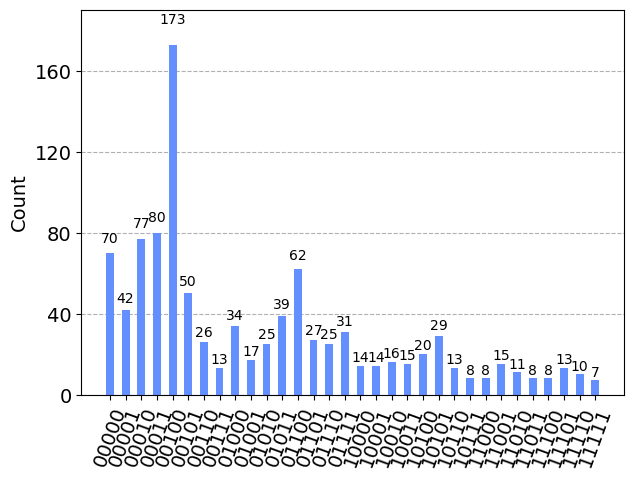

In [5]:
def map_num(x,in_min,in_max,out_min,out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min


counts = result.get_counts(compiled_circuit)
counts_sorted = sorted(counts.items(), key = lambda kv:(kv[1], kv[0]))

max_k = counts_sorted[-1][0]
max_v = counts_sorted[-1][1]

print(counts)
print(max_k)
print(max_v)

result_num = int(max_k,2)
tarot_card_index = int(map_num(result_num,0,31,0,21))
tarot_card_inverse = max_v % 2 == 0

plot_histogram(counts)

In [8]:
tarot_result = tarot_map[tarot_card_index]

print('------* 结果 *------')
print(tarot_result['name'])
print(tarot_result['inverse'][int(tarot_card_inverse)])

------* 结果 *------
女祭司 (The High Priestess)
正位：纯真无邪的、拥有直觉判断能力的、揭发真相的、运用潜意识的力量、掌握知识的、正确的判断、理性的思考、单恋的、精神上的恋爱、对爱情严苛的、回避爱情的、对学业有助益的。
